# Project: TMDb movies Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset contains information about 10,000 movies collected from The Movie Database (TMDb),including budget and revenue. It consists of different columns such as
'cast', 'genres', 'keywords' ,'production companies' (which are separated by pipe(|) characters), 'vote count' and 'vote average', 'runtime', 'budget' etc. 
The first two columns contains the 'id' and 'imdb id' for the movies.
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.
    In this project, we are going to be analyzing the data set to get the most popular genre of movies from year to year and the ones that yielded high revenues including the properties associated.


### Question(s) for Analysis
1. Which genres are most popular from year to year? 
2. What kinds of properties are associated with movies that have high revenues?
    2.1. Do high_vote_count yield high revenues?
    2.2.

In [1]:
# import necessary libaries and packages to be used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

**Let's load in our dataset.**

In [2]:
# Load in the dataset
df = pd.read_csv('tmdb_movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


**Great! Let's explore our dataset.**

In [3]:
# to know the number of rows and columns
df.shape

(10866, 21)

**This tells us that we have 10866 rows (i.e movie samples) and 21 columns (different information about the movie samples) in this dataset.**

In [4]:
# for more information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

**Here, we can see the names of all the columns in this dataset, the datatypes and the number of entries in each column.**


### Data Cleaning


**Now we clean our data i.e we fix problems in our data.** 

**First, let us drop the columns that are not relevant for the analysis of this dataset with the pandas drop() function.**

In [5]:
df.drop(['id', 'imdb_id', 'tagline', 'keywords','overview', 'runtime', 'production_companies', 'director','cast', 'homepage','release_date', ], 
        axis =1, inplace=True)
df.head()

,popularity,budget,revenue,original_title,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


**Now, the columns have been dropped. Let's check the new dimension of our dataset.**

In [6]:
df.shape

(10866, 10)

**We now have 10866 rows and 10 columns.**

**Then, let's check for columns with incorrect data types.**

In [7]:
# to check if our datatypes are incorrect or not
df.dtypes

popularity        float64
budget              int64
revenue             int64
original_title     object
genres             object
vote_count          int64
vote_average      float64
release_year        int64
budget_adj        float64
revenue_adj       float64
dtype: object

**This shows that each columns are stored in their appropriate data types and therefore does not need to be fixed.**

In [8]:
# to check for duplicates
duplicate = df[df.duplicated()]
duplicate

,popularity,budget,revenue,original_title,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,0.59643,30000000,967000,TEKKEN,Crime|Drama|Action|Thriller|Science Fiction,110,5.0,2010,30000000.0,967000.0


**This shows that we have 1 duplicated row. Let's drop it.**

In [9]:
# to drop duplicates
df.drop_duplicates(inplace = True)

In [10]:
# to confirm if the duplicate has been dropped
sum(df.duplicated())

0

**This confirms that there are no longer duplicates.**

**Next, let's check for missing values and fix them.**

In [11]:
# to check for missing values
df.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
genres            23
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

**The 'genre' column contains data stored in string so we can't fill them with mean(), instead, we drop the rows with the missing values.**

In [12]:
df.dropna(inplace=True)

In [13]:
#to check if the rows with missing values has been dropped
df.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
genres            0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

**Great!. It has been dropped now. Let's check the number of rows we have now.**

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 10 columns):
popularity        10842 non-null float64
budget            10842 non-null int64
revenue           10842 non-null int64
original_title    10842 non-null object
genres            10842 non-null object
vote_count        10842 non-null int64
vote_average      10842 non-null float64
release_year      10842 non-null int64
budget_adj        10842 non-null float64
revenue_adj       10842 non-null float64
dtypes: float64(4), int64(4), object(2)
memory usage: 931.7+ KB


**Now, we have a total number of 10842 rows.**

In [15]:
df.describe()

,popularity,budget,revenue,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10842.000000,1.084200e+04,1.084200e+04,10842.000000,10842.000000,10842.000000,1.084200e+04,1.084200e+04
mean,0.647461,1.465531e+07,3.991138e+07,217.823649,5.974064,2001.314794,1.758712e+07,5.147797e+07
std,1.001032,3.093971e+07,1.171179e+08,576.180993,0.934257,12.813617,3.433437e+07,1.447723e+08
min,0.000065,0.000000e+00,0.000000e+00,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.208210,0.000000e+00,0.000000e+00,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.384532,0.000000e+00,0.000000e+00,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.715393,1.500000e+07,2.414118e+07,146.000000,6.600000,2011.000000,2.092507e+07,3.387838e+07
max,32.985763,4.250000e+08,2.781506e+09,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


**From this, we can tell that the average vote count of the movies is 217 and the mean of the vote average is approximatey 6. The average budget and revenue is 1.4million and 3.9million respectively.** 

In [16]:
df.head(5)

,popularity,budget,revenue,original_title,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


**From the above cell, we can see that some columns have their values separated by pipe(|) characters. To clean these column, we split the values. But based on your questions, I need the genre column for now so I will split the genre column now.**

In [17]:
list_col = df['genres']

In [18]:
unique_genres= list_col.unique()

In [19]:
unique_genres

array(['Action|Adventure|Science Fiction|Thriller',
       'Adventure|Science Fiction|Thriller',
       'Action|Adventure|Science Fiction|Fantasy', ...,
       'Adventure|Drama|Action|Family|Foreign',
       'Comedy|Family|Mystery|Romance',
       'Mystery|Science Fiction|Thriller|Drama'], dtype=object)

In [20]:
# this code picks the first index of the unique genres
text = unique_genres[0]

In [21]:
text.split('|')

['Action', 'Adventure', 'Science Fiction', 'Thriller']

In [22]:
# splitting the genre column
list_holder = []
for string in unique_genres:
    strng_split = string.split("|")
    for split in strng_split:
        if split not in list_holder:
            list_holder.append(split)
print (list_holder)            

['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy', 'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy', 'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror', 'Documentary', 'TV Movie', 'Foreign']


**We have splitted the values in the genre column and now we have each of the different movie genres in this dataset.**

**Now we create additional columns with entries of our rows.**

In [23]:
# return 1 if genre exist in row of the genre column else return 0
for genres in list_holder:
    df[genres] = df['genres'].apply(lambda x : 1 if genres in x else 0)

In [24]:
df.head()

,popularity,budget,revenue,original_title,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,...,Comedy,Mystery,Romance,War,History,Music,Horror,Documentary,TV Movie,Foreign
0,32.985763,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,...,0,0,0,0,0,0,0,0,0,0
1,28.419936,150000000,378436354,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08,...,0,0,0,0,0,0,0,0,0,0
2,13.112507,110000000,295238201,Insurgent,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08,...,0,0,0,0,0,0,0,0,0,0
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09,...,0,0,0,0,0,0,0,0,0,0
4,9.335014,190000000,1506249360,Furious 7,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09,...,0,0,0,0,0,0,0,0,0,0


<a id='eda'></a>
## Exploratory Data Analysis





### 1. Which genres are most popular from year to year?

In [25]:
sum_genre=df[['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy', 'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy', 'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror', 'Documentary', 'TV Movie', 'Foreign']]
sum_genre.sum()

Action             2384
Adventure          1471
Science Fiction    1229
Thriller           2907
Fantasy             916
Crime              1354
Western             165
Drama              4760
Family             1231
Animation           699
Comedy             3793
Mystery             810
Romance            1712
War                 270
History             334
Music               408
Horror             1637
Documentary         520
TV Movie            167
Foreign             188
dtype: int64

**From the result above, we have already known the genre with the highest count but it is important for us to visualize it. We can either show it in a pie chart to show the shares of distribution or use a bar chart which would clearly show the genre type with the highest count.**

**Before we make any plot, let's convert the above result to a dataframe so we would be able to plot it.**

In [26]:
sumDf= pd.DataFrame(sum_genre.sum())
sumDf.head(10)

,0
Action,2384
Adventure,1471
Science Fiction,1229
Thriller,2907
Fantasy,916
Crime,1354
Western,165
Drama,4760
Family,1231
Animation,699


**Now we plot.**

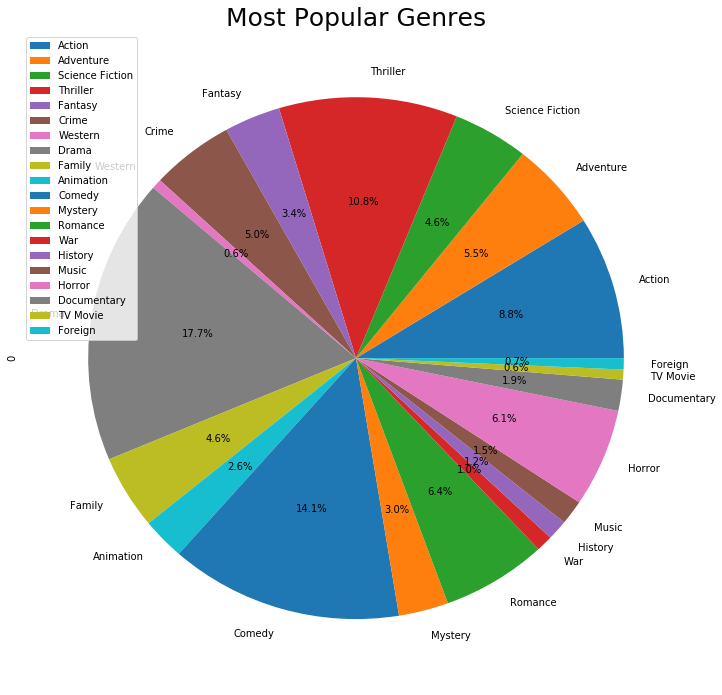

In [27]:
# Creating plot(pie)
sumDf.plot.pie(y = 0, figsize= (12,12), autopct= '%1.1f%%');
plt.title ('Most Popular Genres', fontsize= 25, alpha= 7);
plt.legend(loc=0);

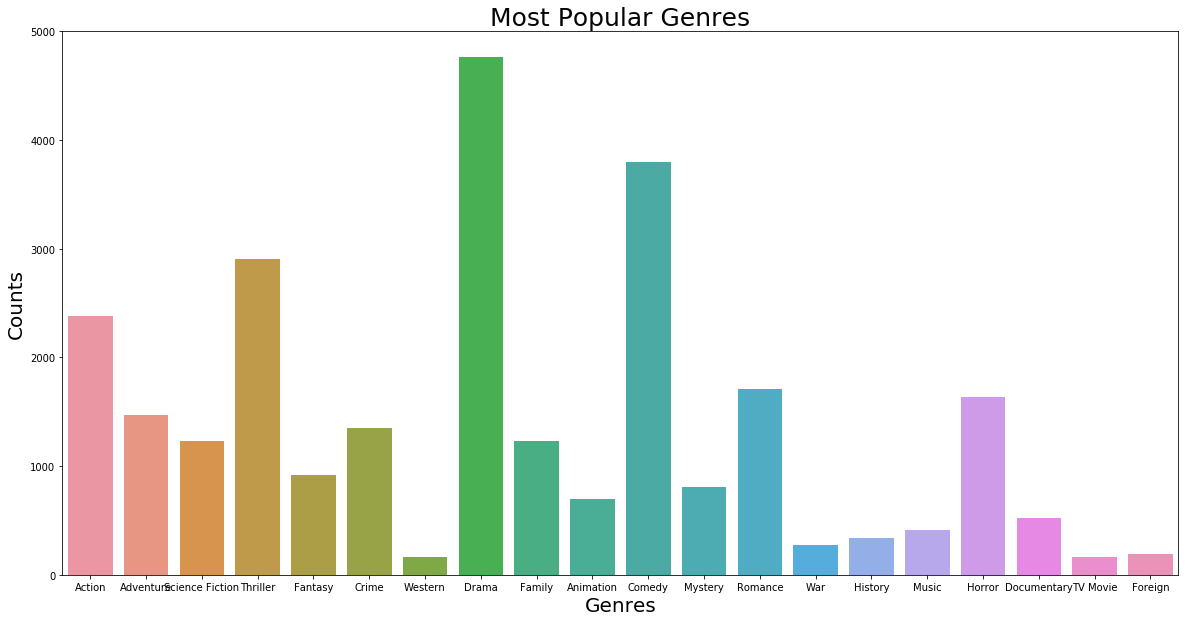

In [28]:
#Creating plot(bar)
plt.figure(figsize= (20,10))
sns.barplot(x = sumDf.index, y = sumDf[0], data= sumDf);
plt.xlabel('Genres',fontsize= 20)
plt.ylabel('Counts',fontsize= 20)
plt.title ('Most Popular Genres', fontsize= 25, alpha= 7)
plt.legend()
plt.show()

### 2. What kinds of properties are associated with movies that have high revenues?
#### - VOTE COUNT and Revenue(Target Variable/Dependent)

**One of the properties associated with movies with high revenue is vote count. Let's create a mask for that**

**2.1. Another question we can ask is do high_vote_count yield high revenues?** 

In [29]:
df.vote_count.mean()

217.82364877328905

In [30]:
# select movies with vote count less than mean
low_vote_count= df.query('vote_count< 217.8')

#select movies with vote count greater than or equal to mean
high_vote_count= df.query('vote_count>= 217.8')

In [31]:
num_samples = df.shape[0]
num_samples == low_vote_count['revenue'].count() + high_vote_count['revenue'].count() 
# should be True

True

In [32]:
# get mean revenue for low vote count
low_vote_count.revenue.mean()

8783380.4426547866

In [33]:
# get mean revenue for high vote count
high_vote_count.revenue.mean()

170416433.65900382

In [34]:
median = df['vote_count'].median()
low = df.query('vote_count < {}'.format(median))
high = df.query('vote_count >= {}'.format(median))

mean_revenue_low = low['revenue'].mean()
mean_revenue_high = high['revenue'].mean()

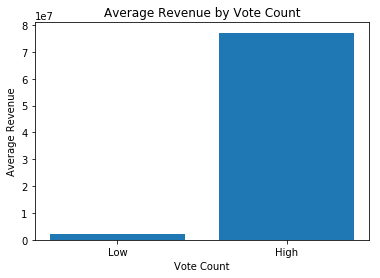

In [35]:
locations = [1, 2]
heights = [mean_revenue_low, mean_revenue_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Revenue by Vote Count')
plt.xlabel('Vote Count')
plt.ylabel('Average Revenue');

**This plot above clearly shows that low vote count yields low revenue and also high vote yields high revenue.**

### - POPULARITY and Revenue (Target Variable/Dependent)

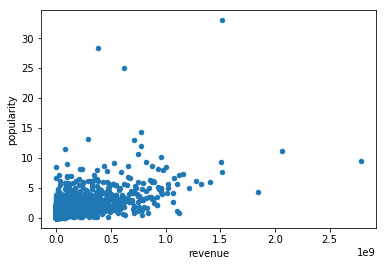

In [36]:
df.plot(x= 'revenue' , y= 'popularity' , kind = 'scatter');

**This shows that there's a positive correlation between popularity and revenue. Though we have some outliers. But the positive correlation between the two variables shows that the higher the popularity count, the higher the revenue that will be produced and vice versa.**

<a id='conclusions'></a>
## Conclusions
**Summary of my Data Cleaning Process**
1. I dropped columns that are irrelevant to my analysis.
2. Also, I dropped rows with missing values which I could not fill with mean because they are not numeric data types.
3. I dropped duplicates.
4. I splitted the genre column which was separated by pipe characters. There were also other columns that were separated by        pipe (|) characters but it was not splitted since they were not relevant.

**Summary of my Findings**
 
 There were some limitations I encountered in the dataset. There were some rows that had missing values and zero values in some others. These missing values and zero values often results in inaccurate analysis. For example, there was some missing values in the 'genre' column which I used majorly for the analysis.
 In this analysis, I found out the most popular genre which is DRAMA which had the highest bar on the bar graph and the biggest distribution in the pie chart.
 Also, for the two properties that determined the movies with high revenue, the  second bar chart shows that High VOTE COUNT (which the one of the properties) yield high revenues i.e. movie samples that had high vote count produced more revenue. 
 Then, for the other property(POPULARITY), the scatter plot shows that there's correlation between it and the target variable(REVENUE).



## Submitting your Project 


In [37]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0